In [31]:
from google.colab import files # allows us to import Kaggle csv files into colab
uploaded = files.upload() # importing the model training data

Saving train.csv to train (3).csv


In [32]:
import pandas as pd # data manipulation and analysis library to store csv data
import io # allows us to manage file I/O
df = pd.read_csv(io.BytesIO(uploaded['train.csv'])) # importing csv data into pandas dataframe
df.drop("Id", axis=1, inplace=True) # dropping id column as it is not a feature of the data
df = df.select_dtypes(['number']) # dropping non-numeric problems as they don't work with lightgbm
x = df.drop(["SalePrice"], axis=1) # setting data/input to be the dataframe without the label/output
y = df.SalePrice # setting label/output to be only that column of the dataframe

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

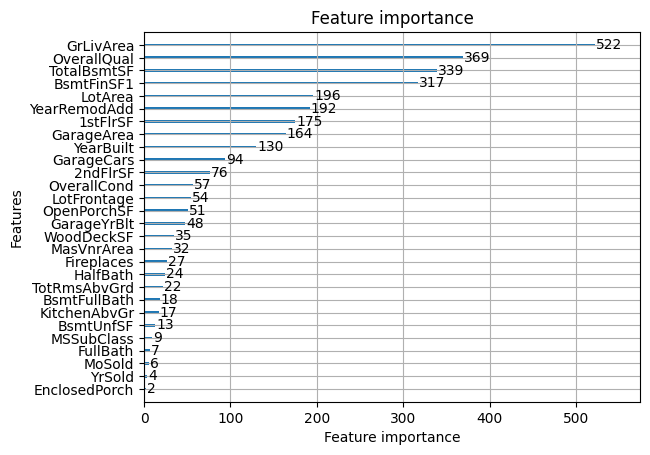

In [33]:
import lightgbm as ltb # gradient-boosting framework for machine learning
model = ltb.LGBMRegressor(learning_rate=0.01) # constructs gradient boosting model with learning rate passed as parameter
model.fit(x, y) # builds model based on training dataset x and y
# plots importance of model's features based on weight (the number of times a feature is used to split data across all trees)
ltb.plot_importance(model)

In [34]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


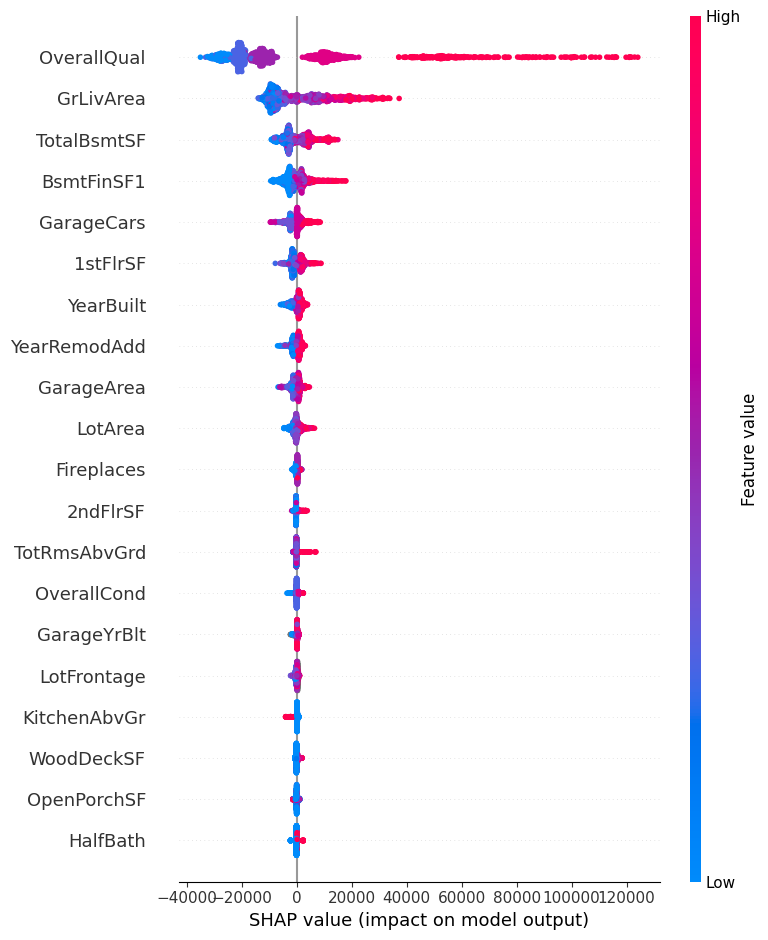

In [35]:
import shap # package for debugging and explaining machine learning models
explainer = shap.TreeExplainer(model) # creates TreeExplainer object
shap_values = explainer(x) # calculates shap values for features
shap.summary_plot(shap_values, x) # plots beeswarm plot of all shap values for features across all the input data

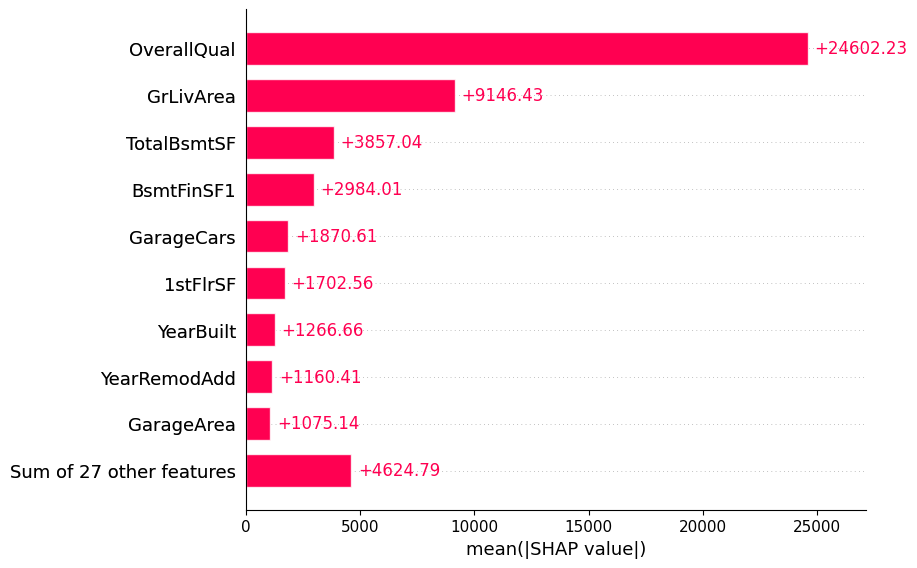

In [36]:
shap.plots.bar(shap_values) # plots bar plot of mean absolute shap values for features across all input data

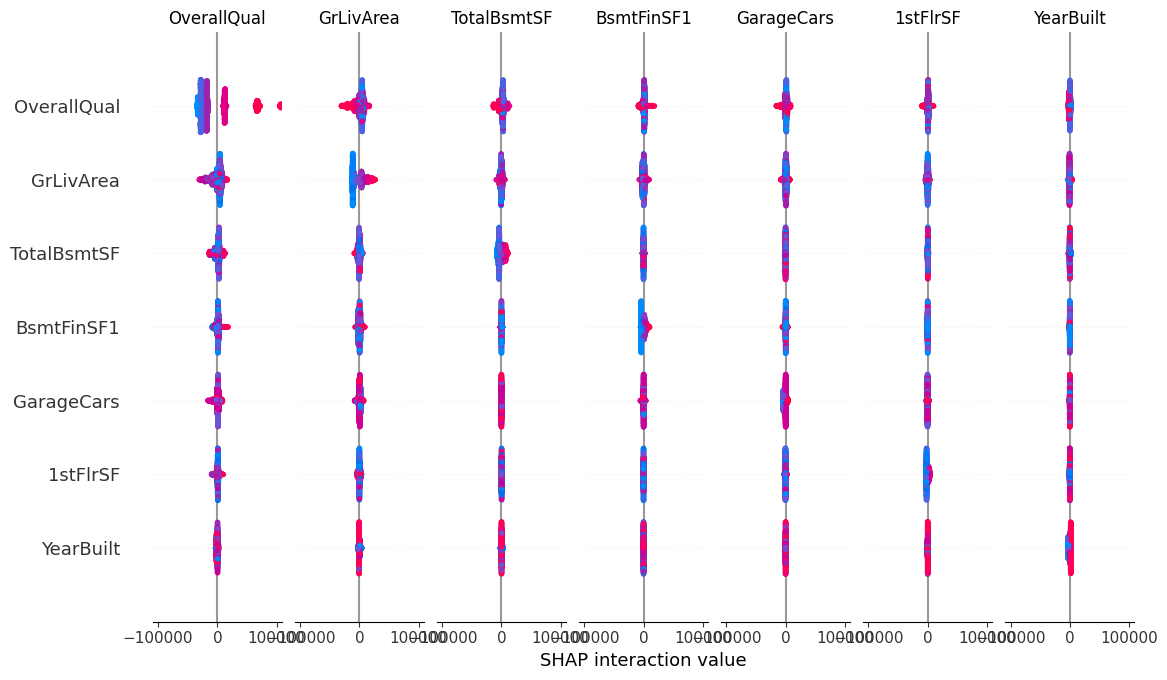

In [39]:
shap_interaction = shap.TreeExplainer(model).shap_interaction_values(x) # calculates shap interactions values for features across all input data
shap.summary_plot(shap_interaction, x) # plots the shap interaction values